## Problem Statement 

 This data was extracted from the census bureau database found at   

     ​http://www.census.gov/ftp/pub/DES/www/welcome.html  

    Donor: Ronny Kohavi and Barry Becker,   

    Data Mining and Visualization   

    Silicon Graphics.   

    e-mail: ronnyk@sgi.com for questions.  

    Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).   

    48842 instances, mix of continuous and discrete (train=32561, test=16281)   

    45222 if instances with unknown values are removed (train=30162, test=15060)  

    Duplicate or conflicting instances : 6  

    Class probabilities for adult.all file   

    Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)   

    Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

In [1]:
# Importing the Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBClassifier
from sklearn import svm

C:\Users\Satish\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Load the datasets

In [2]:
#load the training dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [3]:
# test dataset
test_df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#Columns Names
column_Names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'income']

In [8]:
# Adding the column names to dataset
data.columns = column_Names

In [9]:
test_df.columns = column_Names

In [10]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
test_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## Exploratory Data Analysis 

In [12]:
# Checking for missing values
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [13]:
test_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
data.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [17]:
data.shape

(32561, 15)

In [18]:
data.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [19]:
# Sex column has 2 unique values
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [20]:
# Target variable (Wage_class) has 2 unique values
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [21]:
#native-country has 42 unique values
data['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [22]:
# Race has 5 unique values
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [23]:
# Occupation has 15 unique values
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [24]:
# Relationship has 6 unique values
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [25]:
# Marital-status has 7 unique values
data['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [26]:
# Education has 16 unique values 
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [27]:
# Workclass has 9 unique values
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

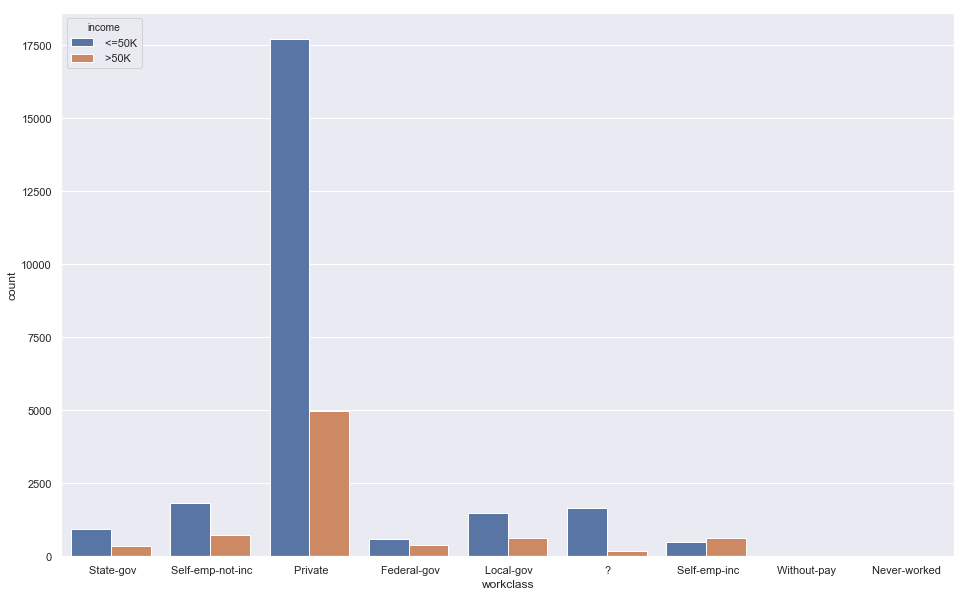

In [28]:
# For Train Dataset
plt.figure(figsize=(16,10))
sns.set(style="darkgrid")
sns.countplot(x='workclass',hue='income',data=data)
plt.show()

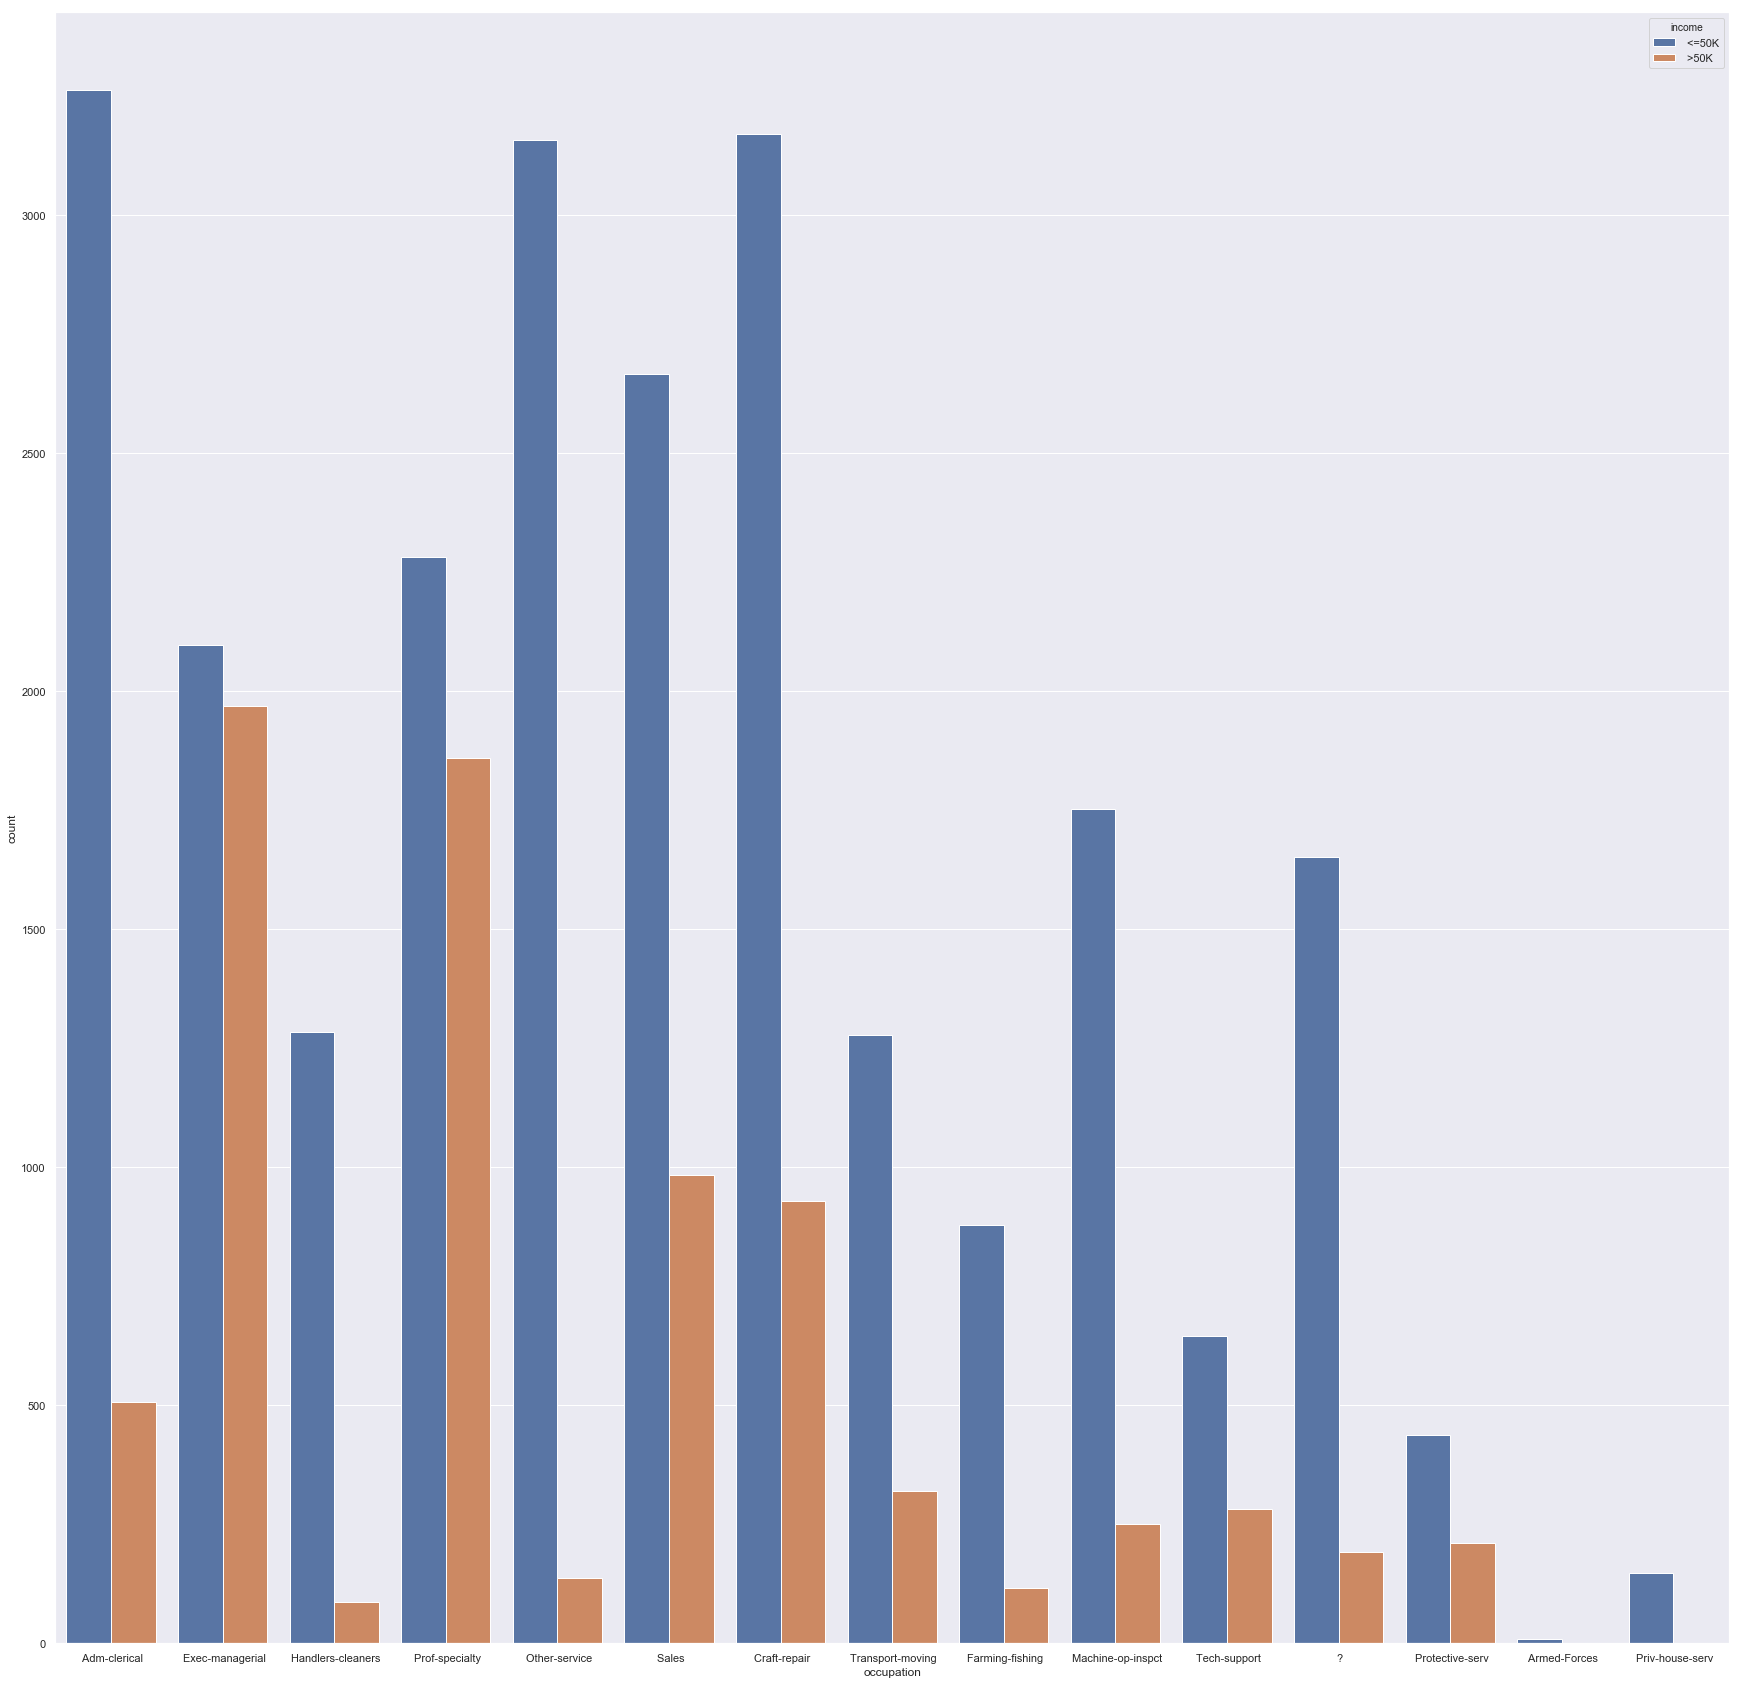

In [29]:
# For train datasets
plt.figure(figsize=(30,30))
sns.set(style="darkgrid")
sns.countplot(x='occupation',hue='income',data=data)
plt.show()

In [30]:
data.income = data.income.map({' <=50K':0, ' >50K':1, ' <=50K.':0, ' >50K.':1}).astype(int)

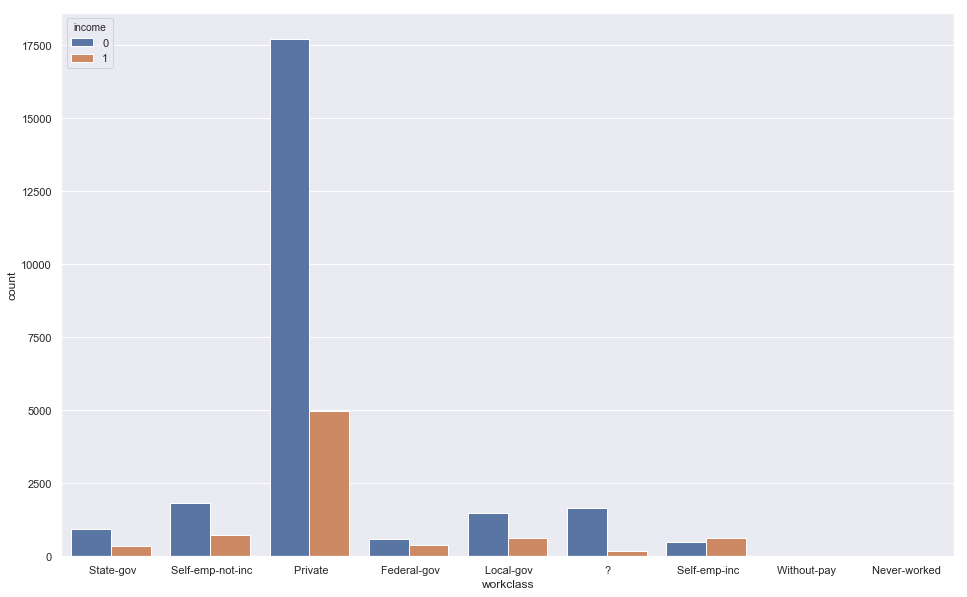

In [31]:
# For Train Dataset
plt.figure(figsize=(16,10))
sns.set(style="darkgrid")
sns.countplot(x='workclass',hue='income',data=data)
plt.show()

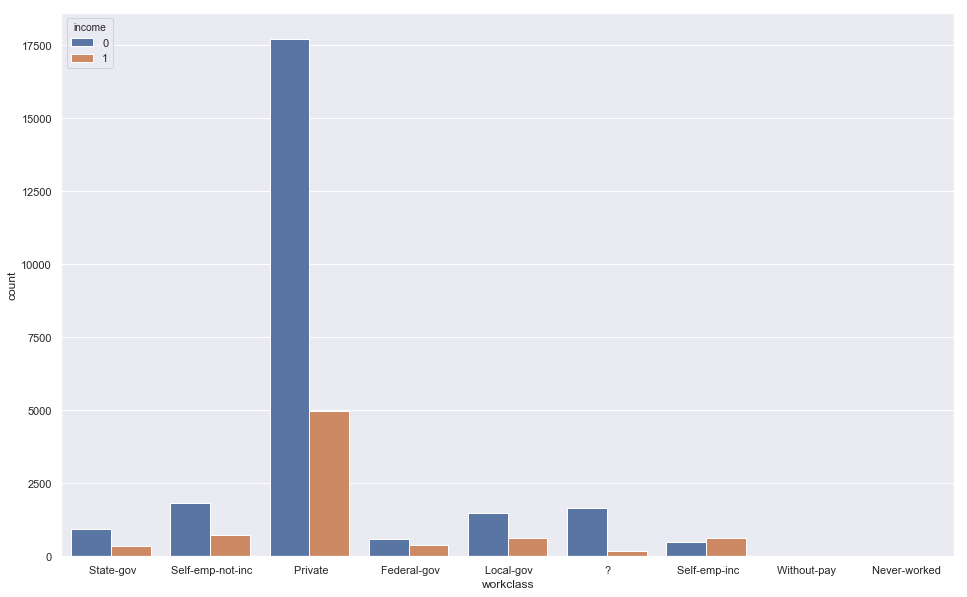

In [32]:
# For Train Dataset
plt.figure(figsize=(16,10))
sns.set(style="darkgrid")
sns.countplot(x='workclass',hue='income',data=data)
plt.show()

In [33]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [34]:
pd.crosstab(data['income'],data['workclass'])

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,,
0,1645,589,1476,7,17733,494,1817,945,14
1,191,371,617,0,4963,622,724,353,0


In [35]:
pd.crosstab(data['income'],data['occupation'])

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
income,,,,,,,,,,,,,,,
0,1652,3263,8,3170,2098,879,1284,1752,3158,148,2281,438,2667,645,1277
1,191,507,1,929,1968,115,86,250,137,1,1859,211,983,283,320


In [36]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [37]:
data= data.replace(' ?', np.nan).dropna()

In [38]:
data['workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [39]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [40]:
test_df['workclass'].value_counts()

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64

In [41]:
test_df= test_df.replace(' ?', np.nan).dropna()

In [42]:
test_df['workclass'].value_counts()

 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64

In [43]:
# applying the get dummies
income_df = pd.get_dummies(data)
income_df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
test_df=test_df.drop('income', axis=1) 

In [46]:
test_data = pd.get_dummies(test_df)
test_data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting the data into train and test datasets

In [47]:
X = income_df.drop('income', axis=1)

In [48]:
y = income_df.income

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

### Models Creation, training and prediction

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [51]:
def plot_ROC(prediction):
    print('-'*40)
    print('Confusion Matrix')
    print(confusion_matrix(y_test,prediction))
    print('-'*40)
    print('Classification Report')
    print(classification_report(y_test,prediction))
    print('-'*40)
    print('AUC ROC')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [52]:
performance_values = []

#### Logistic Regression model

In [53]:
# Creating the Logistic Regression model object
lg= LogisticRegression()

In [54]:
lg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

----------------------------------------
Confusion Matrix
[[6562  207]
 [1673  607]]
----------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.80      0.97      0.87      6769
          1       0.75      0.27      0.39      2280

avg / total       0.78      0.79      0.75      9049

----------------------------------------
AUC ROC


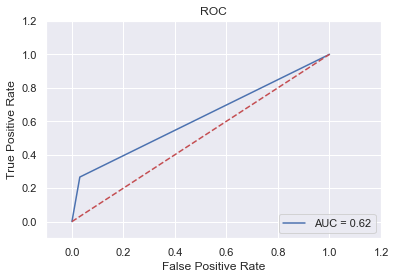

In [55]:
train_score = lg.score(X_train,y_train)
test_score = lg.score(X_test,y_test)
predictedValues = lg.predict(X_test)
plot_ROC(predictedValues)


In [56]:
print(f'Logistic Regression Model : Train score - {train_score} - Test score - {test_score}')
performance_values.append({'algorithm':'Logistic Regression', 'training_score':train_score, 'testing_score':test_score})

Logistic Regression Model : Train score - 0.7902713967697627 - Test score - 0.7922422367112388


#### Decision Tree Model

In [57]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

----------------------------------------
Confusion Matrix
[[5906  863]
 [ 804 1476]]
----------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.88      0.87      0.88      6769
          1       0.63      0.65      0.64      2280

avg / total       0.82      0.82      0.82      9049

----------------------------------------
AUC ROC


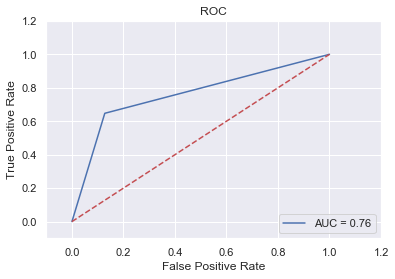

In [58]:
train_score = dt_model.score(X_train,y_train)
test_score = dt_model.score(X_test,y_test)
predictedValues = dt_model.predict(X_test)
plot_ROC(predictedValues)

In [59]:
print(f'Decision Tree : Train score - {train_score} - Test score - {test_score}')
performance_values.append({'algorithm':'Decision Tree', 'training_score':train_score, 'testing_score':test_score})

Decision Tree : Train score - 1.0 - Test score - 0.8157807492540612


#### Random Forest Model

In [60]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

----------------------------------------
Confusion Matrix
[[6290  479]
 [ 953 1327]]
----------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.87      0.93      0.90      6769
          1       0.73      0.58      0.65      2280

avg / total       0.83      0.84      0.84      9049

----------------------------------------
AUC ROC


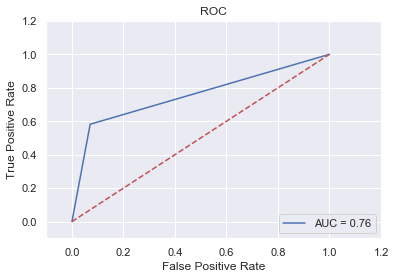

In [61]:
train_score = rf_model.score(X_train,y_train)
test_score = rf_model.score(X_test,y_test)
predictionValues = rf_model.predict(X_test)
plot_ROC(predictionValues)

In [62]:
print(f'Random Forest : Train score - {train_score} - Test score - {test_score}')
performance_values.append({'algorithm':'Random Forest', 'training_score':train_score, 'testing_score':test_score})

Random Forest : Train score - 0.9876379481835835 - Test score - 0.8417504696651563


#### Gaussian Naive Bayes

In [63]:
GNB = GaussianNB()

----------------------------------------
Confusion Matrix
[[6432  337]
 [1537  743]]
----------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.81      0.95      0.87      6769
          1       0.69      0.33      0.44      2280

avg / total       0.78      0.79      0.76      9049

----------------------------------------
AUC ROC


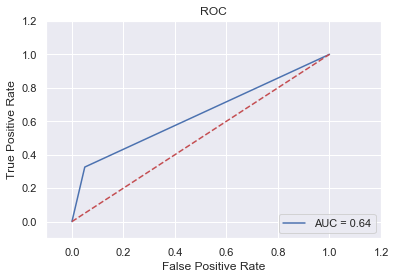

In [64]:
GNB.fit(X_train,y_train)
train_score = GNB.score(X_train,y_train)
test_score = GNB.score(X_test,y_test)
predictionValues = GNB.predict(X_test)
plot_ROC(predictionValues)

In [65]:
print(f'Gaussian Naive Bayes : Training score - {train_score} - Test score - {test_score}')
performance_values.append({'algorithm':'Gaussian Naive Bayes', 'training_score':train_score, 'testing_score':test_score})

Gaussian Naive Bayes : Training score - 0.7878084592431204 - Test score - 0.792905293402586


#### KNN Model

In [66]:
knn_scores = []
train_scores = []
test_scores = []

KNN 1 : Training score - 1.0 -- Test score - 0.7204110951486352
KNN 3 : Training score - 0.8596599251645906 -- Test score - 0.7492540612222345
KNN 5 : Training score - 0.827215459669398 -- Test score - 0.7636202895347552
KNN 7 : Training score - 0.8104011746317434 -- Test score - 0.7754448005304454
KNN 9 : Training score - 0.8059489414105053 -- Test score - 0.78085976350978
KNN 11 : Training score - 0.8017335291052906 -- Test score - 0.7838435186208421
KNN 13 : Training score - 0.8000757826931274 -- Test score - 0.786164217040557
KNN 15 : Training score - 0.798323307914555 -- Test score - 0.7887059343573876
KNN 17 : Training score - 0.7974707526168712 -- Test score - 0.7903635760857554
KNN 19 : Training score - 0.7968076540520058 -- Test score - 0.790584594982871


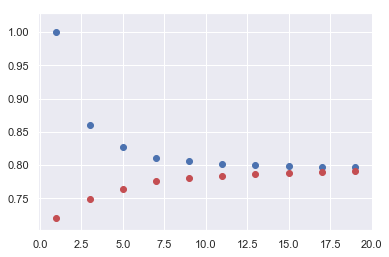

In [67]:
for n in range(1,20,2):
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train,y_train)
    train_score = knn_model.score(X_train,y_train)
    test_score = knn_model.score(X_test,y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'KNN {n} : Training score - {train_score} -- Test score - {test_score}')
    knn_scores.append({'algorithm':'KNN', 'training_score':train_score})
    
plt.scatter(x=range(1, 20, 2),y=train_scores,c='b')
plt.scatter(x=range(1, 20, 2),y=test_scores,c='r')

plt.show()

----------------------------------------
Confusion Matrix
[[6177  592]
 [1547  733]]
----------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.80      0.91      0.85      6769
          1       0.55      0.32      0.41      2280

avg / total       0.74      0.76      0.74      9049

----------------------------------------
AUC ROC


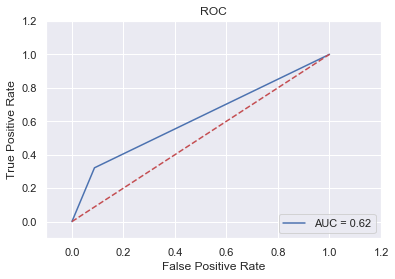

In [68]:
knn_model5 = KNeighborsClassifier(n_neighbors=5)
knn_model5.fit(X_train,y_train)
knn_model5.score(X_train,y_train)
train_score = knn_model5.score(X_train,y_train)
test_score = knn_model5.score(X_test,y_test)
predictionValues = knn_model5.predict(X_test)
plot_ROC(predictionValues)

In [69]:
print(f'K Neighbors : Training score - {train_score} - Test score - {test_score}')
performance_values.append({'algorithm':'K Neighbors', 'training_score':train_score, 'testing_score':test_score})

K Neighbors : Training score - 0.827215459669398 - Test score - 0.7636202895347552


#### Support Vector Machine Model

In [70]:
svc_model = svm.SVC(kernel='linear')
scaler = StandardScaler()
scaler.fit(X_train, y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [71]:
x_trainScaled = scaler.transform(X_train)
x_testScaled = scaler.transform(X_test)

In [72]:
svc_model.fit(x_trainScaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

----------------------------------------
Confusion Matrix
[[6347  422]
 [ 943 1337]]
----------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.87      0.94      0.90      6769
          1       0.76      0.59      0.66      2280

avg / total       0.84      0.85      0.84      9049

----------------------------------------
AUC ROC


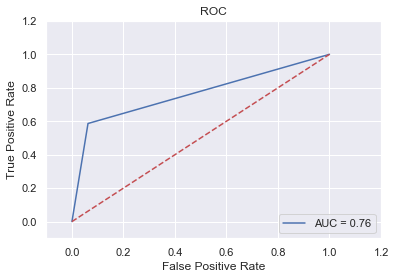

In [73]:
train_score = svc_model.score(x_trainScaled,y_train)
test_score = svc_model.score(x_testScaled,y_test)
predictionValues = svc_model.predict(x_testScaled)
plot_ROC(predictionValues)

In [74]:
print(f'SVM : Train score - {train_score} - Test score - {test_score}')
performance_values.append({'algorithm':'SVM', 'training_score':train_score, 'testing_score':test_score})

SVM : Train score - 0.8481977928290627 - Test score - 0.8491546027185324


#### XG Boost Model

In [75]:
XGB_model = XGBClassifier()
XGB_model.fit(X_train,y_train,  eval_set = [(X_train,y_train),(X_test, y_test)], early_stopping_rounds=20)

[0]	validation_0-error:0.159759	validation_1-error:0.159686
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.159759	validation_1-error:0.159686
[2]	validation_0-error:0.159759	validation_1-error:0.159686
[3]	validation_0-error:0.159759	validation_1-error:0.159686
[4]	validation_0-error:0.159759	validation_1-error:0.159686
[5]	validation_0-error:0.159759	validation_1-error:0.159686
[6]	validation_0-error:0.159759	validation_1-error:0.159686
[7]	validation_0-error:0.159759	validation_1-error:0.159686
[8]	validation_0-error:0.159759	validation_1-error:0.159686
[9]	validation_0-error:0.159523	validation_1-error:0.158802
[10]	validation_0-error:0.159523	validation_1-error:0.158802
[11]	validation_0-error:0.159523	validation_1-error:0.158802
[12]	validation_0-error:0.156586	validation_1-error:0.15626
[13]	validation_0-error:0.156539	validation_1-error:0.156

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

C:\Users\Satish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Satish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Satish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


----------------------------------------
Confusion Matrix
[[6430  339]
 [ 881 1399]]
----------------------------------------
Classification Report
             precision    recall  f1-score   support

          0       0.88      0.95      0.91      6769
          1       0.80      0.61      0.70      2280

avg / total       0.86      0.87      0.86      9049

----------------------------------------
AUC ROC


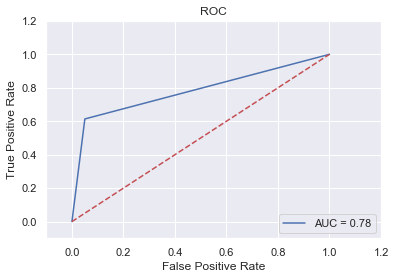

In [77]:
train_score = XGB_model.score(X_train,y_train)
test_score = XGB_model.score(X_test,y_test)
predictionValues = XGB_model.predict(X_test)
plot_ROC(predictionValues)

In [78]:
print(f'XGBoost : Train score - {train_score} - Test score - {test_score}')
performance_values.append({'algorithm':'XGBoost', 'training_score':train_score, 'testing_score':test_score})

XGBoost : Train score - 0.8625017761568702 - Test score - 0.865178472759421


### Conclusion

In [79]:
# Performance of various modela re listed below
performance_values

[{'algorithm': 'Logistic Regression',
  'training_score': 0.7902713967697627,
  'testing_score': 0.7922422367112388},
 {'algorithm': 'Decision Tree',
  'training_score': 1.0,
  'testing_score': 0.8157807492540612},
 {'algorithm': 'Random Forest',
  'training_score': 0.9876379481835835,
  'testing_score': 0.8417504696651563},
 {'algorithm': 'Gaussian Naive Bayes',
  'training_score': 0.7878084592431204,
  'testing_score': 0.792905293402586},
 {'algorithm': 'K Neighbors',
  'training_score': 0.827215459669398,
  'testing_score': 0.7636202895347552},
 {'algorithm': 'SVM',
  'training_score': 0.8481977928290627,
  'testing_score': 0.8491546027185324},
 {'algorithm': 'XGBoost',
  'training_score': 0.8625017761568702,
  'testing_score': 0.865178472759421}]

## From above performance values XGBoost model is having better score values then other models. So,we recommend the XGBoost algorithm for this dataset

In [80]:
test_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
count,15060.000000,1.506000e+04,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,...,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,1.896164e+05,10.112749,1120.301594,89.041899,40.951594,0.030744,0.068592,0.731806,0.037981,...,0.001859,0.004382,0.000598,0.001992,0.000863,0.000797,0.000531,0.915538,0.001262,0.000465
std,13.380676,1.056150e+05,2.558727,7703.181842,406.283245,12.062831,0.172628,0.252768,0.443034,0.191158,...,0.043080,0.066057,0.024440,0.044589,0.029369,0.028218,0.023043,0.278089,0.035498,0.021555
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.166550e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,1.779550e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,48.000000,2.385888e+05,13.000000,0.000000,0.000000,45.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
test_data=test_data.drop('native_country_ Holand-Netherlands', axis=1)

In [97]:
# Creating the column as this data is not present in test data
test_data.insert(77,"native_country_ Holand-Netherlands",np.array(0))

In [98]:
test_data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [99]:
# Predicting the test values using the XGBoost Model
predictionValues = XGB_model.predict(test_data)
predictionValues

C:\Users\Satish\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

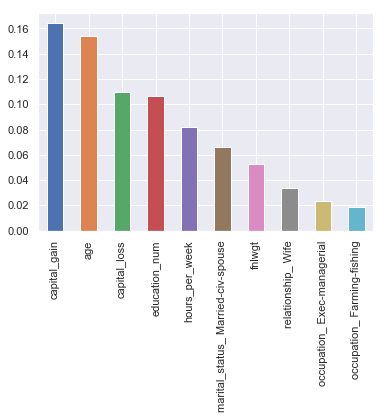

In [100]:
# feature importance
feature_imp = pd.Series(XGB_model.feature_importances_, index=X.columns)
feature_imp.nlargest(10).plot(kind='bar')
plt.show()

In [102]:
# Storing the predicted values in a excel file
test_data_pred=test_data
test_data_pred["Income"]=predictionValues
test_data_pred.to_csv(r'C:\Users\Public\predicted.csv',encoding='utf-8', index=False)
